# Challenge 2 : youtube_toxic

In this challenge, we study a dataset which describe some youtube videos regarding to the quality of its comments. 

# Data understanding : descriptive statistics

First of all, we download the dataset.

In [16]:
import pandas as pd
youtube_toxic = pd.read_csv("challenge_youtube_toxic.csv",sep=";",encoding = 'latin1')
youtube_toxic.head()

,video_id_court,video_id,channel_id,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,...,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,channel_name,subscriberCount,viewCount,categorie_new,categ_inst,Unnamed: 27
0,Uvvsvw_wxOs,VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLlV2dnN2d193eE9z,UC9GGzAhhvhJO1hL10-BcgNA,3813,18,4,145,79,60,"30,2619",...,28,58,47,23,LeHuffPost,339922,225393312,Core,Pure Players,NaN
1,mCy1ZBdttwA,VVVYS0pyWWN6WTJfZkpFWmdGUEdZMEhRLm1DeTFaQmR0dHdB,UCXKJrYczY2_fJEZgFPGY0HQ,28,2,0,1,0,0,"9,333333",...,0,3,1,0,CNEWS,189971,132125693,Core,TV,NaN
2,iU3MyHMK5nU,VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLmlVM015SE1LNW5V,UC9GGzAhhvhJO1hL10-BcgNA,3804,68,9,56,75,54,"27,56522",...,22,83,49,36,LeHuffPost,339922,225393312,Core,Pure Players,NaN
3,ZUim3AeURtk,VVViWjBDc3I5b3c2WGprZGQ1NDJPbWh3LlpVaW0zQWVVUnRr,UCbZ0Csr9ow6Xjkdd542Omhw,4,0,1,2,0,0,2,...,0,2,0,0,Telegramme,2862,2481100,Niche,Presse_regionale,NaN
4,n5Tg2vhLCAM,VVVoWldzNlBKWTBoTkQzODRkMl9ScmhRLm41VGcydmhMQ0FN,UChZWs6PJY0hND384d2_RrhQ,737,3,1,18,5,6,"32,04347826",...,4,18,7,7,Les Echos,30010,6710737,Core,Presse nationale,NaN


We can see that the data associated to columns "...Moyenne" are string and not number. Thus if we want to use then in our statistics, we need to transform them into float.

In [37]:
youtube_toxic = youtube_toxic.drop(youtube_toxic.columns[[-1]], axis='columns') 

def convert_into_float(string):
    if type(string)==float:
        return string
    return float (string.replace(',','.'))
youtube_toxic['nbrMotMoyenne'] = youtube_toxic['nbrMotMoyenne'].apply(convert_into_float)
youtube_toxic['nbrMotInsulteMoyenne'] = youtube_toxic['nbrMotInsulteMoyenne'].apply(convert_into_float)
youtube_toxic['nbrMotAllongMoyenne'] = youtube_toxic['nbrMotAllongMoyenne'].apply(convert_into_float)
youtube_toxic['nbrMotMAJMoyenne'] = youtube_toxic['nbrMotMAJMoyenne'].apply(convert_into_float)
youtube_toxic['nbrExclMarkMoyenne'] = youtube_toxic['nbrExclMarkMoyenne'].apply(convert_into_float)
youtube_toxic['nbrQuestMarkMoyenne'] = youtube_toxic['nbrQuestMarkMoyenne'].apply(convert_into_float)

Now, we compute some basic descriptive statistics with "describe" and a boxplot.

In [54]:
youtube_toxic.describe()

,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,thread_count,comment_count,message_count,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,subscriberCount,viewCount,Unnamed: 27
count,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,46102.000000,4.610200e+04,0.0
mean,1435.853564,9.418225,3.974665,21.922823,21.823066,13.591276,22.219145,25.700816,47.919960,5.040085,28.726021,14.502646,10.974036,172108.752744,9.255061e+07,NaN
std,7670.789422,61.616732,21.367879,130.038591,120.607203,68.803038,117.441322,130.742237,234.791106,19.578795,140.334032,56.251117,50.607716,119508.318824,6.778302e+07,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.109100e+04,NaN
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,87793.000000,4.635634e+07,NaN
50%,72.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,4.000000,0.000000,3.000000,2.000000,1.000000,180173.000000,6.388093e+07,NaN
75%,398.000000,3.000000,1.000000,6.000000,9.000000,4.000000,9.000000,5.000000,16.000000,2.000000,11.000000,7.000000,4.000000,217835.000000,1.321257e+08,NaN
max,662808.000000,7227.000000,1416.000000,14270.000000,11093.000000,5520.000000,8734.000000,11195.000000,19336.000000,1235.000000,9837.000000,3762.000000,3732.000000,568615.000000,2.414350e+08,NaN


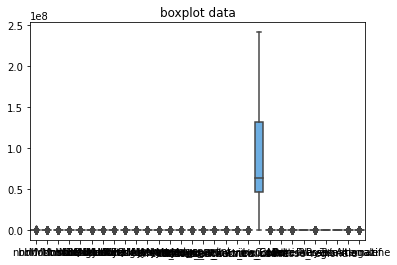

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
plt.title('boxplot data')
youtube_toxic_box=sns.boxplot(data=youtube_toxic)     
plt.show()

In the boxplot, we can see if there are some outliers due to the difference of scale between numbers. While the mean of the viewCount is 2,41e+08, nbrMotAllong's mean is about 4. So we delete the columns where the values are to high and we compute again the boxplot.

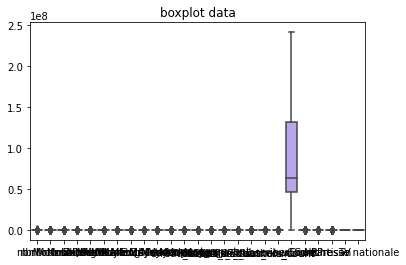

In [38]:
new_youtube_toxic = youtube_toxic.drop(youtube_toxic.columns[[3,-1,-4,-5]], axis='columns') 
plt.figure()
plt.title('boxplot data')
youtube_toxic_box=sns.boxplot(data=new_youtube_toxic)   
plt.show()

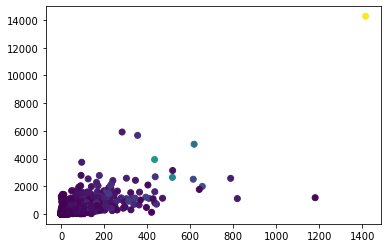

In [57]:
plt.scatter(youtube_toxic['nbrMotAllong'],youtube_toxic['nbrMotMAJ'],c = youtube_toxic['nbrMotInsulte'])

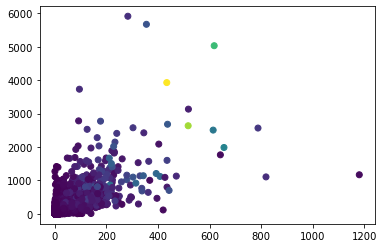

In [39]:
new_youtube_toxic_2 = youtube_toxic[youtube_toxic.nbrMotAllong < 1400]

plt.scatter(new_youtube_toxic_2['nbrMotAllong'],new_youtube_toxic_2['nbrMotMAJ'],c = new_youtube_toxic_2['nbrMotInsulte'])


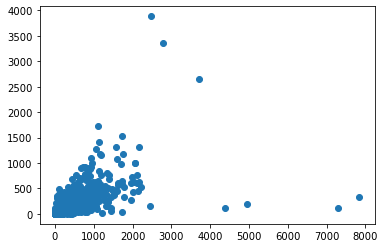

In [47]:
plt.scatter(new_youtube_toxic_2['nbrExclMark'],new_youtube_toxic_2['nbrMotInsulte'])

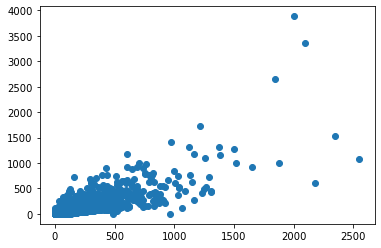

In [46]:
plt.scatter(new_youtube_toxic_2['nbrQuestMark'],new_youtube_toxic_2['nbrMotInsulte'])

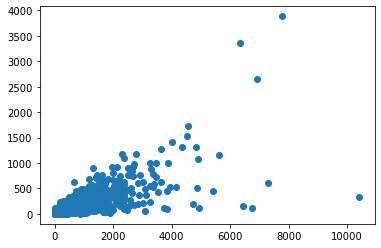

In [45]:
plt.scatter(new_youtube_toxic_2['message_count'],new_youtube_toxic_2['nbrMotInsulte'])

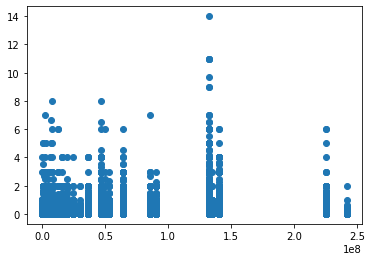

In [44]:
plt.scatter(new_youtube_toxic_2['viewCount'],new_youtube_toxic_2['nbrMotInsulteMoyenne'])

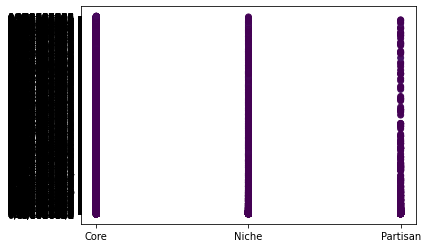

In [61]:
plt.scatter(youtube_toxic['categorie_new'],youtube_toxic['nbrMotInsulteMoyenne'],c = youtube_toxic['nbrMotInsulte'])

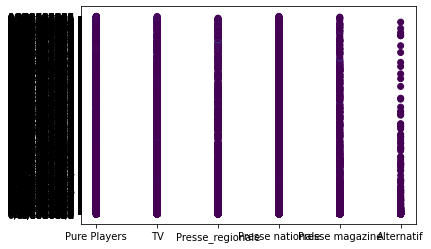

In [62]:
plt.scatter(youtube_toxic['categ_inst'],youtube_toxic['nbrMotInsulteMoyenne'],c = youtube_toxic['nbrMotInsulte'])


Empty DataFrame
Columns: [video_id_court, video_id, channel_id, nbrMot, nbrMotInsulte, nbrMotAllong, nbrMotMAJ, nbrExclMark, nbrQuestMark, nbrMotMoyenne, nbrMotInsulteMoyenne, nbrMotAllongMoyenne, nbrMotMAJMoyenne, nbrExclMarkMoyenne, nbrQuestMarkMoyenne, thread_count, comment_count, message_count, discussion_count, distinct_authors_count, authors_3channels_count, liked_authors_count, channel_name, subscriberCount, viewCount, categorie_new, categ_inst, Unnamed: 27]
Index: []

[0 rows x 28 columns]


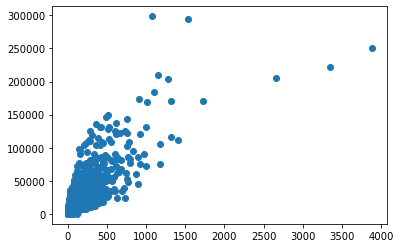

In [74]:
print(new_youtube_toxic_2[new_youtube_toxic_2.nbrMotInsulte > 7000])


plt.scatter(new_youtube_toxic_2['nbrMotInsulte'],new_youtube_toxic_2['nbrMot'])

In [82]:
youtube_toxic.pivot_table('nbrMotInsulte', index='categ_inst', columns='categorie_new', aggfunc="mean")

categorie_new,Core,Niche,Partisan
categ_inst,,,
Alternatif,1.257576,NaN,3.984496
Presse magazine,6.041054,1.017647,0.612903
Presse nationale,7.081160,5.686097,6.310811
Presse_regionale,15.352581,2.677605,NaN
Pure Players,20.485775,3.585586,8.292763
TV,6.717325,NaN,NaN


In [80]:
youtube_toxic.pivot_table('nbrMot', index='categ_inst', columns='categorie_new', aggfunc="mean")

categorie_new,Core,Niche,Partisan
categ_inst,,,
Alternatif,366.969697,NaN,661.362791
Presse magazine,994.888694,130.476471,205.903226
Presse nationale,1784.932258,472.771164,518.108108
Presse_regionale,1823.237679,225.688543,NaN
Pure Players,3203.502193,342.846847,1761.407895
TV,743.506040,NaN,NaN


In [89]:
youtube_toxic['insulte'] = (youtube_toxic['nbrMotInsulte']*100)/youtube_toxic['nbrMot']
youtube_toxic.pivot_table('insulte', index='categ_inst', columns='categorie_new', aggfunc="mean")

categorie_new,Core,Niche,Partisan
categ_inst,,,
Alternatif,0.404101,NaN,0.756399
Presse magazine,0.796282,0.416775,0.107457
Presse nationale,0.729098,1.292594,0.676564
Presse_regionale,1.194658,1.279912,NaN
Pure Players,0.892867,1.512562,0.805033
TV,1.390731,NaN,NaN


In [17]:
def convert_into_float(string):
    if type(string)==float:
        return string
    return float (string.replace(',','.'))
youtube_toxic['nbrMotMoyenne'] = youtube_toxic['nbrMotMoyenne'].apply(convert_into_float)
youtube_toxic['nbrMotInsulteMoyenne'] = youtube_toxic['nbrMotInsulteMoyenne'].apply(convert_into_float)
youtube_toxic['nbrMotAllongMoyenne'] = youtube_toxic['nbrMotAllongMoyenne'].apply(convert_into_float)
youtube_toxic['nbrMotMAJMoyenne'] = youtube_toxic['nbrMotMAJMoyenne'].apply(convert_into_float)
youtube_toxic['nbrExclMarkMoyenne'] = youtube_toxic['nbrExclMarkMoyenne'].apply(convert_into_float)
youtube_toxic['nbrQuestMarkMoyenne'] = youtube_toxic['nbrQuestMarkMoyenne'].apply(convert_into_float)

In [8]:
youtube_toxic.head()

,video_id_court,video_id,channel_id,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,...,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,channel_name,subscriberCount,viewCount,categorie_new,categ_inst,Unnamed: 27
0,Uvvsvw_wxOs,VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLlV2dnN2d193eE9z,UC9GGzAhhvhJO1hL10-BcgNA,3813,18,4,145,79,60,30.261900,...,28,58,47,23,LeHuffPost,339922,225393312,Core,Pure Players,NaN
1,mCy1ZBdttwA,VVVYS0pyWWN6WTJfZkpFWmdGUEdZMEhRLm1DeTFaQmR0dHdB,UCXKJrYczY2_fJEZgFPGY0HQ,28,2,0,1,0,0,9.333333,...,0,3,1,0,CNEWS,189971,132125693,Core,TV,NaN
2,iU3MyHMK5nU,VVU5R0d6QWhodmhKTzFoTDEwLUJjZ05BLmlVM015SE1LNW5V,UC9GGzAhhvhJO1hL10-BcgNA,3804,68,9,56,75,54,27.565220,...,22,83,49,36,LeHuffPost,339922,225393312,Core,Pure Players,NaN
3,ZUim3AeURtk,VVViWjBDc3I5b3c2WGprZGQ1NDJPbWh3LlpVaW0zQWVVUnRr,UCbZ0Csr9ow6Xjkdd542Omhw,4,0,1,2,0,0,2.000000,...,0,2,0,0,Telegramme,2862,2481100,Niche,Presse_regionale,NaN
4,n5Tg2vhLCAM,VVVoWldzNlBKWTBoTkQzODRkMl9ScmhRLm41VGcydmhMQ0FN,UChZWs6PJY0hND384d2_RrhQ,737,3,1,18,5,6,32.043478,...,4,18,7,7,Les Echos,30010,6710737,Core,Presse nationale,NaN


In [12]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

y = youtube_toxic['nbrMotInsulte']
X = youtube_toxic[['nbrMot','nbrMotAllong']]

X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.7486926302293369
poly -79.14279193047399
rbf 0.13329076080209612
sigmoid -36.49427539221928


# Support Vector Machine

## Data preparation

   To compute the SVR, we need float or int as input and ouput. Therefore, we have to transform our string data into number. For the data associated to columns "...Moyenne", we just change the ‘,’ by a point and then we change the string into float.For the other, we create new variables which take the values 0 or 1. For example for a video the variable “Core” is equal to 1 if the channel correspond to the core category otherwise it is equal to 0.

Then we drop the variables that are not taken into account to predict the number of insults as the ‘video_id_count’ or the ‘video_id’. What’s more, the ‘channel_id’ and the ‘channel_name’ can be seen in the number of subscribers that is different for each channel. 

In [26]:
import pandas as pd
youtube_toxic = pd.read_csv("challenge_youtube_toxic.csv",sep=";",encoding = 'latin1')
youtube_toxic.head()

youtube_toxic = youtube_toxic.drop(youtube_toxic.columns[[-1]], axis='columns') 

def convert_into_float(string):
    if type(string)==float:
        return string
    return float (string.replace(',','.'))
youtube_toxic['nbrMotMoyenne'] = youtube_toxic['nbrMotMoyenne'].apply(convert_into_float)
youtube_toxic['nbrMotInsulteMoyenne'] = youtube_toxic['nbrMotInsulteMoyenne'].apply(convert_into_float)
youtube_toxic['nbrMotAllongMoyenne'] = youtube_toxic['nbrMotAllongMoyenne'].apply(convert_into_float)
youtube_toxic['nbrMotMAJMoyenne'] = youtube_toxic['nbrMotMAJMoyenne'].apply(convert_into_float)
youtube_toxic['nbrExclMarkMoyenne'] = youtube_toxic['nbrExclMarkMoyenne'].apply(convert_into_float)
youtube_toxic['nbrQuestMarkMoyenne'] = youtube_toxic['nbrQuestMarkMoyenne'].apply(convert_into_float)

youtube_toxic['Core'] = (youtube_toxic['categorie_new'] == 'Core')*1
youtube_toxic['Niche'] = (youtube_toxic['categorie_new'] == 'Niche')*1
youtube_toxic['Partisan'] = (youtube_toxic['categorie_new'] == 'Partisan')*1
youtube_toxic['Pure Players'] = (youtube_toxic['categ_inst'] == 'Pure Payers')*1
youtube_toxic['Presse_regionale'] = (youtube_toxic['categ_inst'] == 'Presse_regionale')*1
youtube_toxic['TV'] = (youtube_toxic['categ_inst'] == 'TV')*1
youtube_toxic['Presse nationale'] = (youtube_toxic['categ_inst'] == 'Presse nationale')*1
youtube_toxic['Presse magazine'] = (youtube_toxic['categ_inst'] == 'Presse magazine')*1
youtube_toxic['Alternatif'] = (youtube_toxic['categ_inst'] == 'Alternatif')*1

youtube_toxic = youtube_toxic.drop (['categ_inst','categorie_new','video_id_court','video_id','channel_id','channel_name'], axis = 1)

youtube_toxic.head()

,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,nbrMotInsulteMoyenne,nbrMotAllongMoyenne,nbrMotMAJMoyenne,...,viewCount,Core,Niche,Partisan,Pure Players,Presse_regionale,TV,Presse nationale,Presse magazine,Alternatif
0,3813,18,4,145,79,60,30.261900,0.142857,0.031746,1.150794,...,225393312,1,0,0,0,0,0,0,0,0
1,28,2,0,1,0,0,9.333333,0.666667,0.000000,0.333333,...,132125693,1,0,0,0,0,1,0,0,0
2,3804,68,9,56,75,54,27.565220,0.492754,0.065217,0.405797,...,225393312,1,0,0,0,0,0,0,0,0
3,4,0,1,2,0,0,2.000000,0.000000,0.500000,1.000000,...,2481100,0,1,0,0,1,0,0,0,0
4,737,3,1,18,5,6,32.043478,0.130435,0.043478,0.782609,...,6710737,1,0,0,0,0,0,1,0,0


## Code

Then we compute the SVM on our data. First, we split the data into training and test. Then we compute SVM with the different kernel to estimate which is the most efficient. We train our model with the training data and we show the score of each model. 

In [27]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

y = youtube_toxic['nbrMotInsulte']
X = youtube_toxic.drop(['nbrMotInsulte'], axis = 1)

X = preprocessing.scale(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.7107183385578599
poly 0.5472762284490624
rbf 0.1218061354515323
sigmoid -37.93307914259078


We can see that the best model is the linear one. However with a score of 71% of success, the SVR is not our best model. We can find more efficient methods. 

In [ ]:
### Arbres de régression et random forest 

